# DATA ANALYSIS
In this notebook we gonna explore the available data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import spacy
import seaborn as sns
from collections import defaultdict
from collections import Counter
import numpy as np
import re
import seaborn as sns

nlp = spacy.load('en_core_web_trf')

/opt/homebrew/Caskroom/miniconda/base/envs/hlt/lib/python3.12/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/opt/homebrew/Caskroom/miniconda/base/envs/hlt/lib/python3.12/site-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [2]:
df = pd.read_csv('data/train.csv')
df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [4]:
df[['target']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
target,7613.0,0.42966,0.49506,0.0,0.0,0.0,1.0,1.0


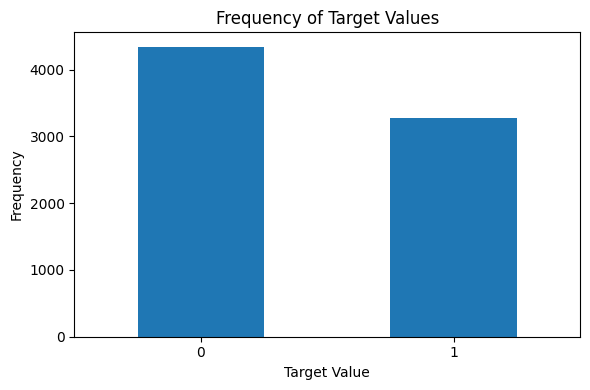

In [5]:
# Count the frequency of each target value
target_counts = df['target'].value_counts()

# Plot the bar chart
plt.figure(figsize=(6, 4))
target_counts.plot(kind='bar')
plt.title('Frequency of Target Values')
plt.xlabel('Target Value')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()

In [6]:
df['keyword'].nunique()

221

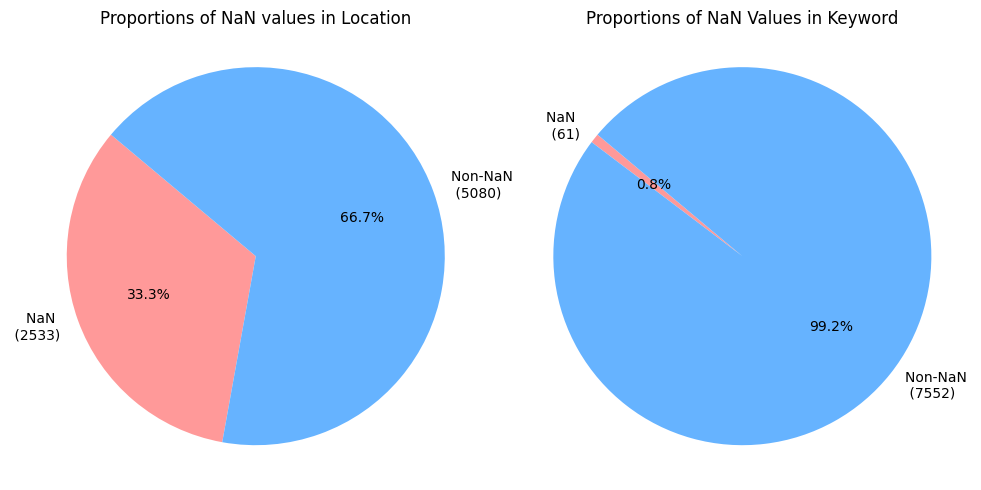

In [7]:
import matplotlib.pyplot as plt

# Count NaN values in 'location' and 'keyword' columns
nan_location_count = df['location'].isna().sum()
nan_keyword_count = df['keyword'].isna().sum()

# Count non-NaN values in 'location' and 'keyword' columns
non_nan_location_count = df['location'].notna().sum()
non_nan_keyword_count = df['keyword'].notna().sum()

# Create labels for the pie charts
labels_location = [f'NaN \n ({nan_location_count})', f'Non-NaN \n ({non_nan_location_count})']
labels_keyword = [f'NaN \n ({nan_keyword_count})', f'Non-NaN \n ({non_nan_keyword_count})']

# Create data for the pie charts
sizes_location = [nan_location_count, non_nan_location_count]
sizes_keyword = [nan_keyword_count, non_nan_keyword_count]

# Create colors for different sections of the pie charts
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

# Plot the pie chart for 'location' column
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(sizes_location, labels=labels_location, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Proportions of NaN values in Location')


# Plot the pie chart for 'keyword' column
plt.subplot(1, 2, 2)
plt.pie(sizes_keyword, labels=labels_keyword, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Proportions of NaN Values in Keyword')

# Adjust layout
plt.tight_layout()

# Show the pie charts
plt.show()


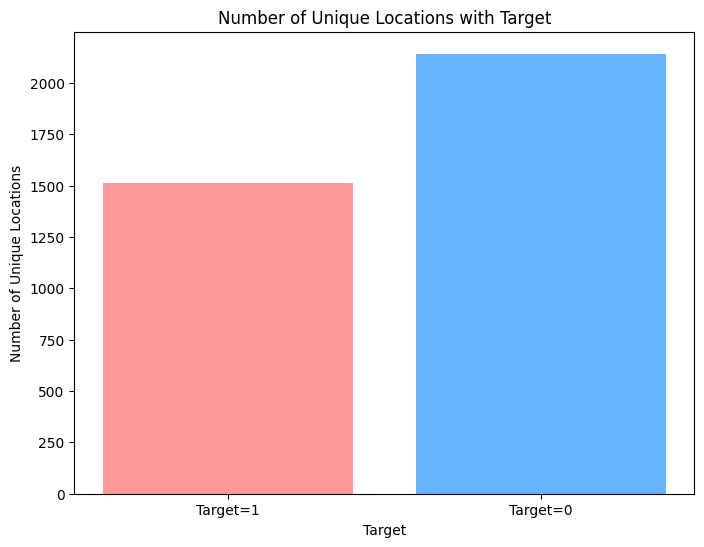

In [8]:
# Get unique locations with target equal to 1
unique_locations_target_one = df[df['target'] == 1]['location'].nunique()

# Get unique locations with target equal to 0
unique_locations_target_zero = df[df['target'] == 0]['location'].nunique()

# Plotting the histogram
plt.figure(figsize=(8, 6))
plt.bar(['Target=1', 'Target=0'], [unique_locations_target_one, unique_locations_target_zero], color=['#ff9999', '#66b3ff'])
plt.title('Number of Unique Locations with Target')
plt.xlabel('Target')
plt.ylabel('Number of Unique Locations')
plt.show()

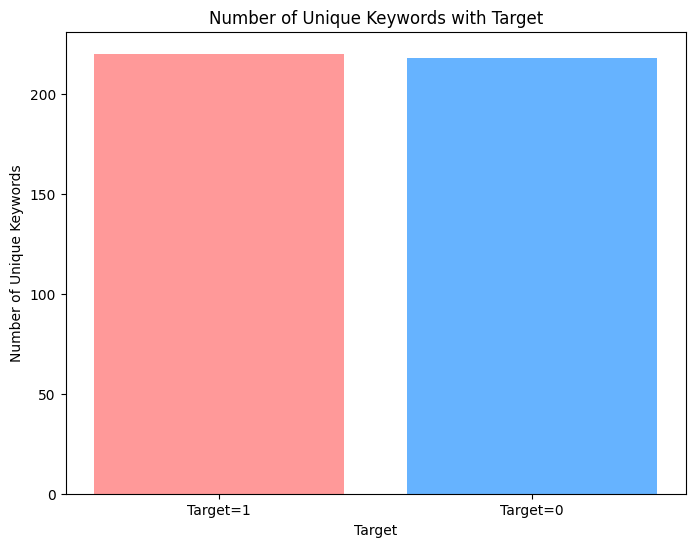

In [9]:
# Get unique locations with target equal to 1
unique_keywords_target_one = df[df['target'] == 1]['keyword'].nunique()

# Get unique locations with target equal to 0
unique_keywords_target_zero = df[df['target'] == 0]['keyword'].nunique()

# Plotting the histogram
plt.figure(figsize=(8, 6))
plt.bar(['Target=1', 'Target=0'], [unique_keywords_target_one, unique_keywords_target_zero], color=['#ff9999', '#66b3ff'])
plt.title('Number of Unique Keywords with Target')
plt.xlabel('Target')
plt.ylabel('Number of Unique Keywords')
plt.show()

In [10]:
# Calculate the length of each text and create a new column 'text_length'
df['text_length'] = df['text'].apply(len)

# Calculate the average and maximum text length
average_text_length = df['text_length'].mean()
max_text_length = df['text_length'].max()

print("Average text length:", average_text_length)
print("Maximum text length:", max_text_length)

Average text length: 101.03743596479706
Maximum text length: 157


target
0     95.706817
1    108.113421
Name: text_length, dtype: float64


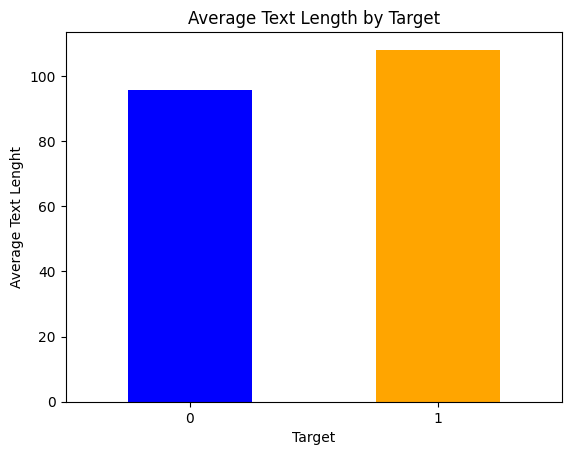

In [11]:
average_text_len_targer = df.groupby('target')['text_length'].mean()

print(average_text_len_targer)

# Plot the average word count in a histogram
average_text_len_targer.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average Text Length by Target')
plt.xlabel('Target')
plt.ylabel('Average Text Lenght')
plt.xticks(rotation=0)
plt.show()

<Figure size 1900x1000 with 0 Axes>

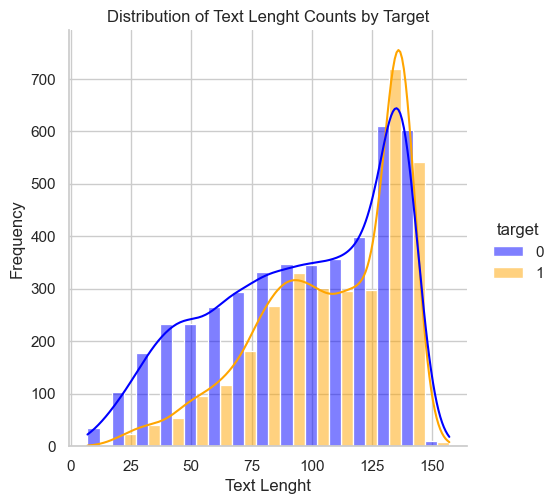

In [48]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(19, 10))
sns.displot(data= df, x='text_length', hue='target', kde=True, multiple='dodge', palette=['blue', 'orange'], binwidth=10)
plt.title('Distribution of Text Lenght Counts by Target')
plt.xlabel('Text Lenght')
plt.ylabel('Frequency')
plt.show()

In [37]:
# Function to calculate word count
def word_count(text):
    return len(text.split())

# Apply the function to each row of the 'text' column
df['word_count'] = df['text'].apply(lambda x: word_count(x))

# Display the DataFrame
df

,id,keyword,location,text,target,text_length,word_count
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,13
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,7
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,22
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,8
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,16
...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,83,11
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,125,20
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65,8
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,137,19


target
0    14.704744
1    15.167533
Name: word_count, dtype: float64


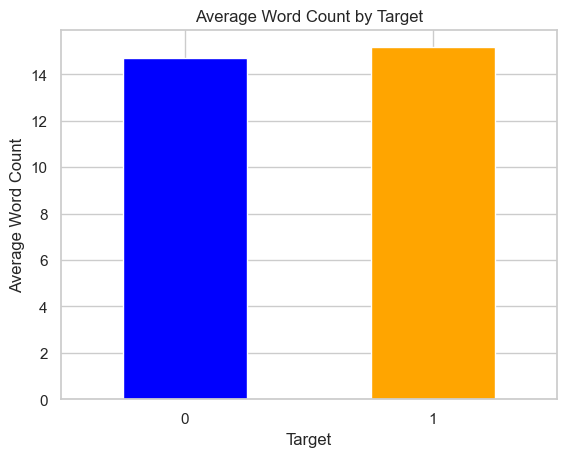

In [38]:
# Calculate the average word count by target
average_word_count = df.groupby('target')['word_count'].mean()
print(average_word_count)

# Plot the average word count in a histogram
average_word_count.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average Word Count by Target')
plt.xlabel('Target')
plt.ylabel('Average Word Count')
plt.xticks(rotation=0)
plt.show()

<Figure size 1900x1000 with 0 Axes>

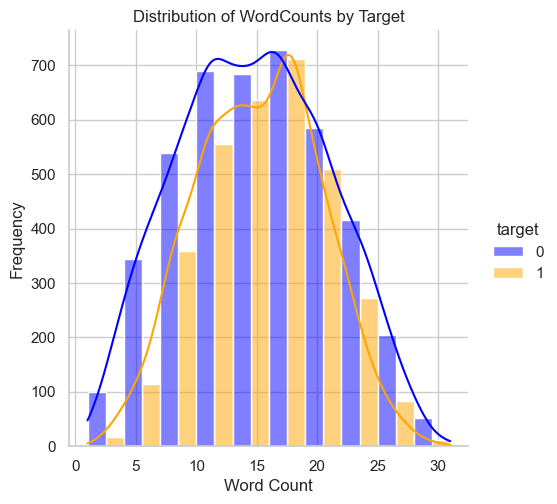

In [45]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(19, 10))
sns.displot(data= df, x='word_count', hue='target', kde=True, multiple='dodge', palette=['blue', 'orange'], binwidth=3)
plt.title('Distribution of WordCounts by Target')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

In [50]:
# Download NLTK stop words data
nltk.download('stopwords')

# Load stop words
stop_words = set(stopwords.words('english'))

# Function to calculate stop word ratio
def stop_word_ratio(text):
    words = text.split()
    num_stop_words = sum(1 for word in words if word.lower() in stop_words)
    return num_stop_words / len(words) if len(words) > 0 else 0

# Apply the function to each row of the 'text' column
df['stop_word_ratio'] = df['text'].apply(stop_word_ratio)

df

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/robertodellarocca/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,id,keyword,location,text,target,text_length,word_count,stop_word_ratio
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,13,0.461538
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,7,0.000000
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,22,0.500000
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,8,0.125000
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,16,0.437500
...,...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,83,11,0.181818
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,125,20,0.450000
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65,8,0.250000
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,137,19,0.263158


target
0    0.302456
1    0.252516
Name: stop_word_ratio, dtype: float64


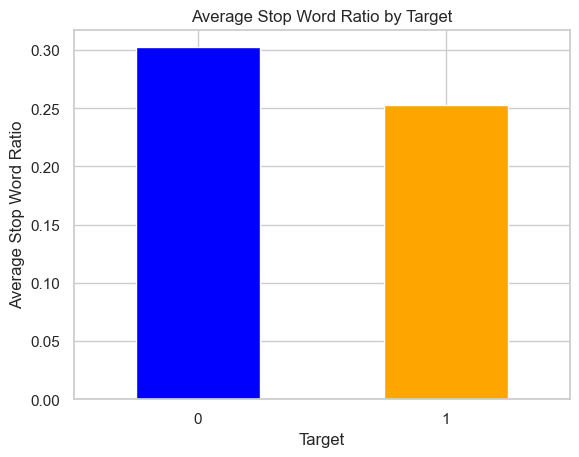

In [51]:
# Calculate the average stop word ratio by target
average_stop_word_ratio = df.groupby('target')['stop_word_ratio'].mean()
print(average_stop_word_ratio)

average_stop_word_ratio.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average Stop Word Ratio by Target')
plt.xlabel('Target')
plt.ylabel('Average Stop Word Ratio')
plt.xticks(rotation=0)
plt.show()

<Figure size 1900x1000 with 0 Axes>

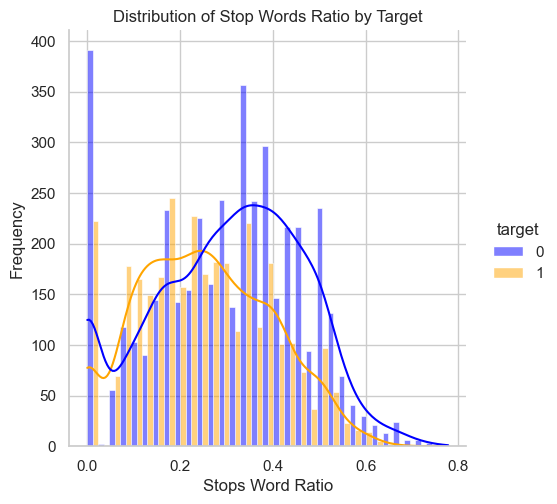

In [55]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(19, 10))
sns.displot(data= df, x='stop_word_ratio', hue='target', kde=True, multiple='dodge', palette=['blue', 'orange'])
plt.title('Distribution of Stop Words Ratio by Target')
plt.xlabel('Stops Word Ratio')
plt.ylabel('Frequency')
plt.show()

In [31]:
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /Users/robertodellarocca/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /Users/robertodellarocca/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /Users/robertodellarocca/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /Users/robertodellarocca/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /Users/robertodellarocca/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /Users/robertodellarocc

True

In [56]:
# Function to calculate unique word count
def unique_word_count(text):
    words = word_tokenize(text.lower())  # Tokenize text and convert to lowercase
    unique_words = set(words)
    return len(unique_words)

# Apply the function to each row of the 'text' column
df['unique_word_count'] = df['text'].apply(unique_word_count)

df

,id,keyword,location,text,target,text_length,word_count,stop_word_ratio,unique_word_count
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,13,0.461538,14
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,7,0.000000,8
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,22,0.500000,21
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,8,0.125000,9
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,16,0.437500,16
...,...,...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,83,11,0.181818,13
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,125,20,0.450000,18
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65,8,0.250000,15
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,137,19,0.263158,19


target
0    16.542377
1    17.335983
Name: unique_word_count, dtype: float64


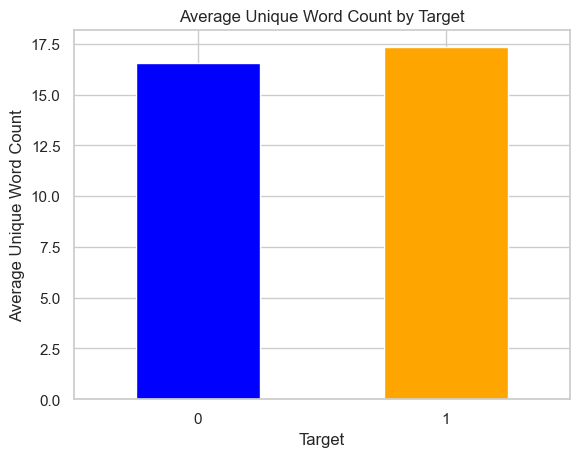

In [57]:
# Calculate the average unique word count by target
average_unique_word_count = df.groupby('target')['unique_word_count'].mean()

# Display the average unique word count
print(average_unique_word_count)

average_unique_word_count.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average Unique Word Count by Target')
plt.xlabel('Target')
plt.ylabel('Average Unique Word Count')
plt.xticks(rotation=0)
plt.show()

<Figure size 1900x1000 with 0 Axes>

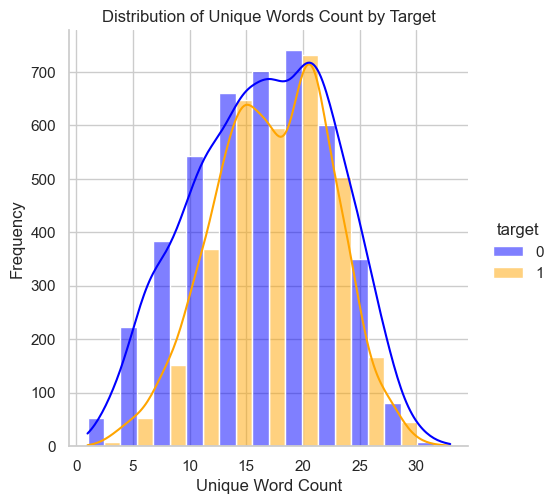

In [61]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(19, 10))
sns.displot(data= df, x='unique_word_count', hue='target', kde=True, multiple='dodge', palette=['blue', 'orange'], binwidth=3)
plt.title('Distribution of Unique Words Count by Target')
plt.xlabel('Unique Word Count')
plt.ylabel('Frequency')
plt.show()

In [64]:
# Function to calculate Type-Token Ratio (TTR)
def ttr(text):
    words = word_tokenize(text.lower())  # Tokenize text and convert to lowercase
    total_words = len(words)
    unique_words = set(words)
    total_unique_words = len(unique_words)
    if total_words > 0:
        return total_unique_words / total_words
    else:
        return 0

# Apply the function to each row of the 'text' column
df['ttr'] = df['text'].apply(ttr)

df

,id,keyword,location,text,target,text_length,word_count,stop_word_ratio,unique_word_count,ttr
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,13,0.461538,14,1.000000
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,7,0.000000,8,1.000000
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,22,0.500000,21,0.875000
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,8,0.125000,9,1.000000
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,16,0.437500,16,0.888889
...,...,...,...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,83,11,0.181818,13,1.000000
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,125,20,0.450000,18,0.750000
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65,8,0.250000,15,1.000000
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,137,19,0.263158,19,0.904762


target
0    0.902543
1    0.911844
Name: ttr, dtype: float64


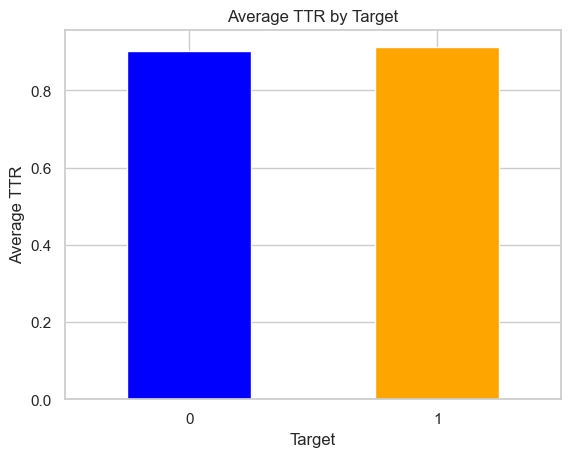

In [65]:
average_ttr = df.groupby('target')['ttr'].mean()

# Display the average ttr 
print(average_ttr)

average_ttr.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average TTR by Target')
plt.xlabel('Target')
plt.ylabel('Average TTR')
plt.xticks(rotation=0)
plt.show()

<Figure size 1900x1000 with 0 Axes>

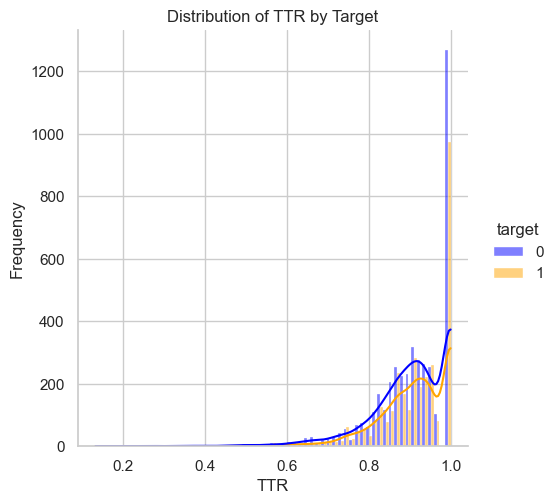

In [70]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(19, 10))
sns.displot(data= df, x='ttr', hue='target', kde=True, multiple='dodge', palette=['blue', 'orange'])
plt.title('Distribution of TTR by Target')
plt.xlabel('TTR')
plt.ylabel('Frequency')
plt.show()

In [71]:
# Function to calculate Shannon entropy
def entropy(text):
    # Count the occurrences of each character in the text
    counts = Counter(text.lower())
    # Total number of characters
    total_chars = sum(counts.values())
    # Calculate the probability of each character
    probs = [count / total_chars for count in counts.values()]
    # Calculate Shannon entropy
    entropy = -np.sum([prob * np.log2(prob) for prob in probs])
    return entropy

# Apply the function to each row of the 'text' column
df['entropy'] = df['text'].apply(entropy)

# Display the DataFrame
df

,id,keyword,location,text,target,text_length,word_count,stop_word_ratio,unique_word_count,ttr,entropy
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,13,0.461538,14,1.000000,3.932597
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,7,0.000000,8,1.000000,3.655051
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,22,0.500000,21,0.875000,4.016236
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,8,0.125000,9,1.000000,4.110357
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,16,0.437500,16,0.888889,4.084352
...,...,...,...,...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,83,11,0.181818,13,1.000000,4.358793
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,125,20,0.450000,18,0.750000,4.047573
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65,8,0.250000,15,1.000000,4.824055
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,137,19,0.263158,19,0.904762,4.118722


target
0    4.215828
1    4.342451
Name: entropy, dtype: float64


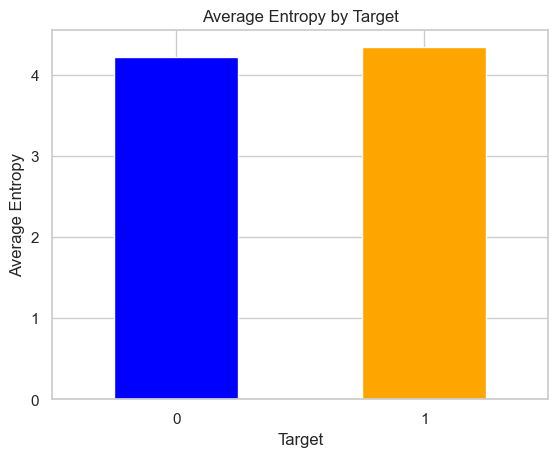

In [72]:
average_entropy = df.groupby('target')['entropy'].mean()

print(average_entropy)

average_entropy.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average Entropy by Target')
plt.xlabel('Target')
plt.ylabel('Average Entropy')
plt.xticks(rotation=0)
plt.show()

<Figure size 1900x1000 with 0 Axes>

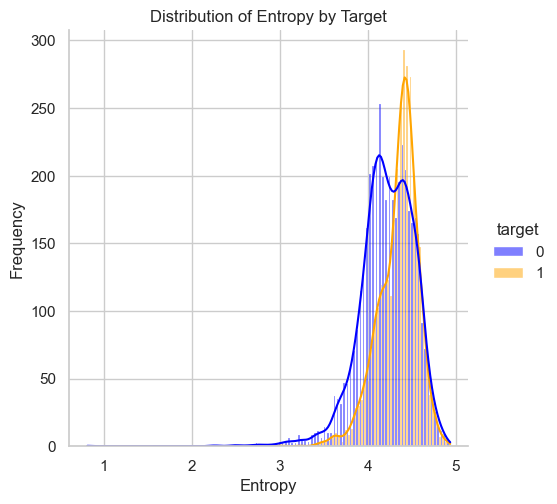

In [73]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(19, 10))
sns.displot(data= df, x='entropy', hue='target', kde=True, multiple='dodge', palette=['blue', 'orange'])
plt.title('Distribution of Entropy by Target')
plt.xlabel('Entropy')
plt.ylabel('Frequency')
plt.show()

In [74]:
import string

# Function to count punctuation symbols
def punctuation_count(text):
    # Define punctuation characters
    punctuation_chars = set(string.punctuation)
    # Count occurrences of punctuation symbols in the text
    punctuation_count = sum(1 for char in text if char in punctuation_chars)
    return punctuation_count

# Apply the function to each row of the 'text' column
df['punctuation_count'] = df['text'].apply(punctuation_count)
df

,id,keyword,location,text,target,text_length,word_count,stop_word_ratio,unique_word_count,ttr,entropy,punctuation_count
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,13,0.461538,14,1.000000,3.932597,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,7,0.000000,8,1.000000,3.655051,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,22,0.500000,21,0.875000,4.016236,3
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,8,0.125000,9,1.000000,4.110357,2
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,16,0.437500,16,0.888889,4.084352,2
...,...,...,...,...,...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,83,11,0.181818,13,1.000000,4.358793,5
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,125,20,0.450000,18,0.750000,4.047573,5
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65,8,0.250000,15,1.000000,4.824055,11
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,137,19,0.263158,19,0.904762,4.118722,5


target
0    6.309074
1    7.543565
Name: punctuation_count, dtype: float64


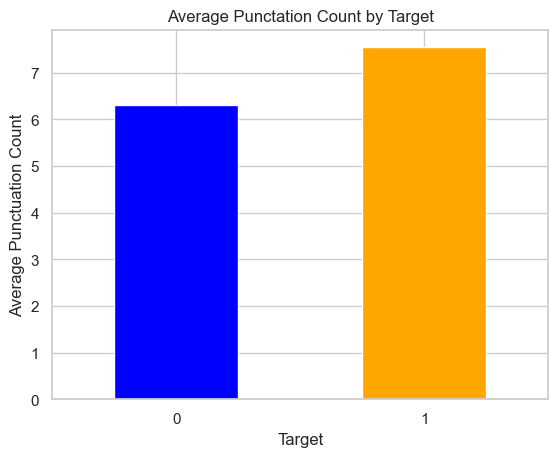

In [41]:
average_punctuation = df.groupby('target')['punctuation_count'].mean()

print(average_punctuation)

average_punctuation.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average Punctation Count by Target')
plt.xlabel('Target')
plt.ylabel('Average Punctuation Count')
plt.xticks(rotation=0)
plt.show()

<Figure size 1900x1000 with 0 Axes>

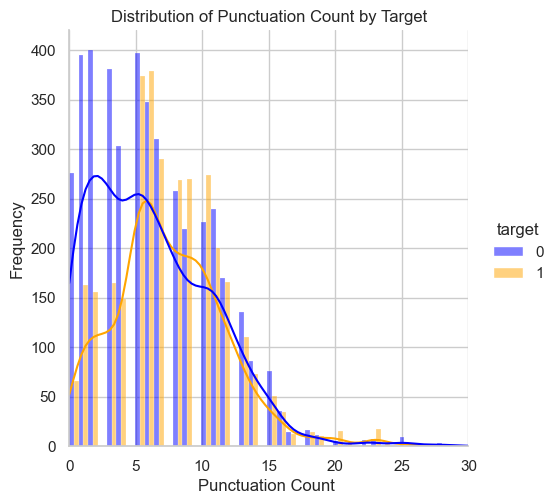

In [124]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(19, 10))
sns.displot(data= df, x='punctuation_count', hue='target', kde=True, multiple='dodge', palette=['blue', 'orange'])
plt.xlim(0, 30)
plt.title('Distribution of Punctuation Count by Target')
plt.xlabel('Punctuation Count ')
plt.ylabel('Frequency')
plt.show()

In [75]:
# Function to count named entities
def ner_count(text):
    doc = nlp(text)
    # Count unique named entities
    entities = set([ent.label_ for ent in doc.ents])
    return len(entities)

# Apply the function to each row of the 'text' column
df['ner_count'] = df['text'].apply(ner_count)

# Display the DataFrame
df

,id,keyword,location,text,target,text_length,word_count,stop_word_ratio,unique_word_count,ttr,entropy,punctuation_count,ner_count
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,13,0.461538,14,1.000000,3.932597,1,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,7,0.000000,8,1.000000,3.655051,1,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,22,0.500000,21,0.875000,4.016236,3,0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,8,0.125000,9,1.000000,4.110357,2,2
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,16,0.437500,16,0.888889,4.084352,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,83,11,0.181818,13,1.000000,4.358793,5,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,125,20,0.450000,18,0.750000,4.047573,5,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65,8,0.250000,15,1.000000,4.824055,11,3
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,137,19,0.263158,19,0.904762,4.118722,5,1


target
0    0.873100
1    1.467441
Name: ner_count, dtype: float64


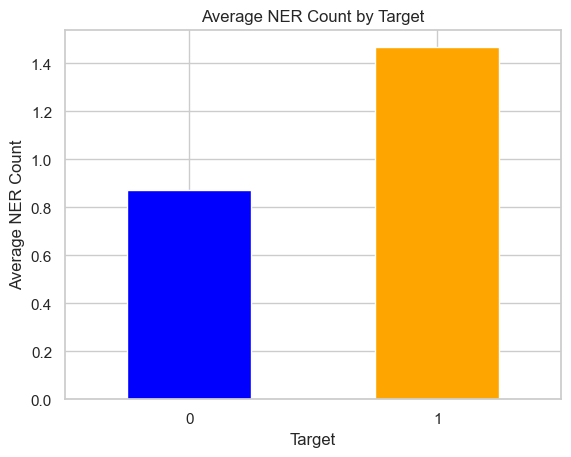

In [76]:
average_ner = df.groupby('target')['ner_count'].mean()

print(average_ner)

average_ner.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average NER Count by Target')
plt.xlabel('Target')
plt.ylabel('Average NER Count')
plt.xticks(rotation=0)
plt.show()

<Figure size 1000x600 with 0 Axes>

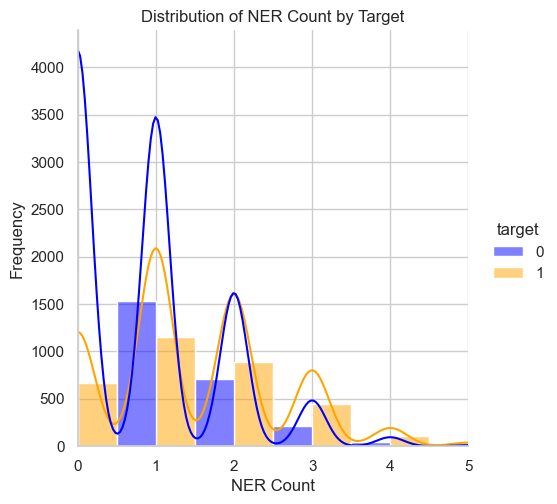

In [126]:
# Plot the distribution
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.displot(data= df, x='ner_count', hue='target', kde=True, multiple='dodge', palette=['blue', 'orange'], discrete = True)
plt.xlim(0, 5)
plt.title('Distribution of NER Count by Target')
plt.xlabel('NER Count')
plt.ylabel('Frequency')
plt.show()

In [27]:
# Function to count POS tags
def pos_count(text, pos_tags):
    doc = nlp(text)
    pos_counts = 0
    for token in doc:
        if token.pos_ in pos_tags:
            pos_counts += 1
    return pos_counts

# Define the POS tags you want to count
pos_tags = ['NOUN', 'ADJ', 'VERB', 'ADP', 'PRON']

# Apply the function to each row of the 'text' column
df['tot_pos_counts'] = df['text'].apply(lambda x: pos_count(x, pos_tags))
df['NOUN_counts'] = df['text'].apply(lambda x: pos_count(x, ['NOUN']))
df['ADJ_counts'] = df['text'].apply(lambda x: pos_count(x, ['ADJ']))
df['VERB_counts'] = df['text'].apply(lambda x: pos_count(x, ['VERB']))
df['ADP_counts'] = df['text'].apply(lambda x: pos_count(x, ['ADP']))
df['PRON_counts'] = df['text'].apply(lambda x: pos_count(x, ['PRON']))

df

,id,keyword,location,text,target,text_length,word_count,stop_word_ratio,unique_word_count,ttr,entropy,punctuation_count,ner_count,tot_pos_counts,NOUN_counts,ADJ_counts,VERB_counts,ADP_counts,PRON_counts
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,13,0.461538,14,1.000000,3.932597,1,1,9,4,0,1,1,3
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,7,0.000000,8,1.000000,3.655051,1,1,3,2,0,0,1,0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,22,0.500000,21,0.875000,4.016236,3,0,15,6,1,5,3,0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,8,0.125000,9,1.000000,4.110357,2,2,6,4,0,1,1,0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,16,0.437500,16,0.888889,4.084352,2,1,9,4,0,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,83,11,0.181818,13,1.000000,4.358793,5,1,8,3,2,2,1,0
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,125,20,0.450000,18,0.750000,4.047573,5,1,12,4,3,0,5,0
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65,8,0.250000,15,1.000000,4.824055,11,3,3,2,0,0,1,0
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,137,19,0.263158,19,0.904762,4.118722,5,1,20,10,4,4,2,0


In [84]:
df = pd.read_csv('analyzed_train.csv')

target
0    8.450484
1    8.831856
Name: tot_pos_counts, dtype: float64


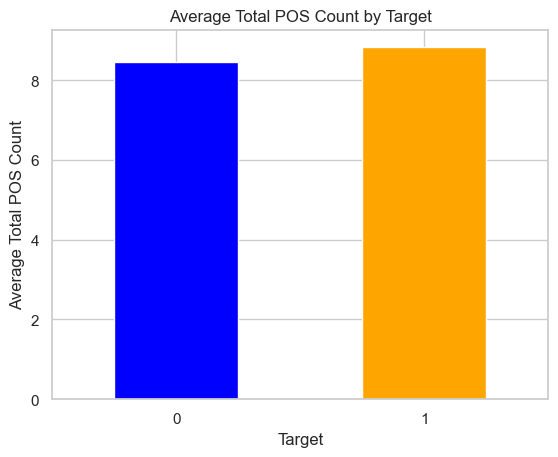

In [85]:
average_tot_pos = df.groupby('target')['tot_pos_counts'].mean()

print(average_tot_pos)

average_tot_pos.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average Total POS Count by Target')
plt.xlabel('Target')
plt.ylabel('Average Total POS Count')
plt.xticks(rotation=0)
plt.show()

<Figure size 1000x600 with 0 Axes>

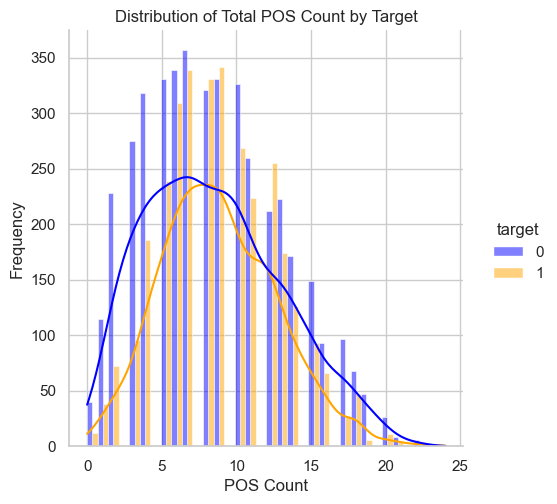

In [87]:
# Plot the distribution
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.displot(data= df, x='tot_pos_counts', hue='target', kde=True, multiple='dodge', palette=['blue', 'orange'])
plt.title('Distribution of Total POS Count by Target')
plt.xlabel('POS Count')
plt.ylabel('Frequency')
plt.show()

target
0    3.048135
1    3.757261
Name: NOUN_counts, dtype: float64


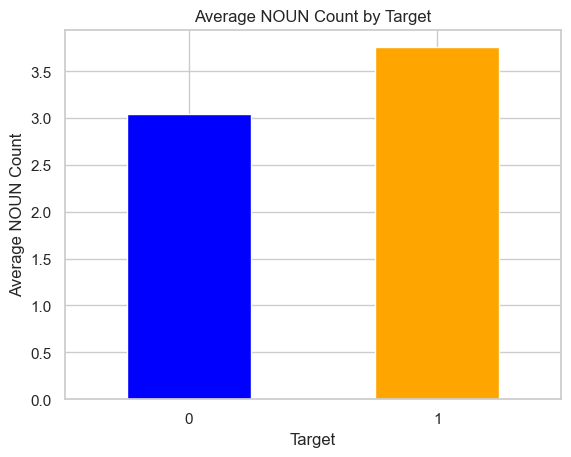

In [53]:
average_nouns = df.groupby('target')['NOUN_counts'].mean()

print(average_nouns)

average_nouns.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average NOUN Count by Target')
plt.xlabel('Target')
plt.ylabel('Average NOUN Count')
plt.xticks(rotation=0)
plt.show()

<Figure size 1000x600 with 0 Axes>

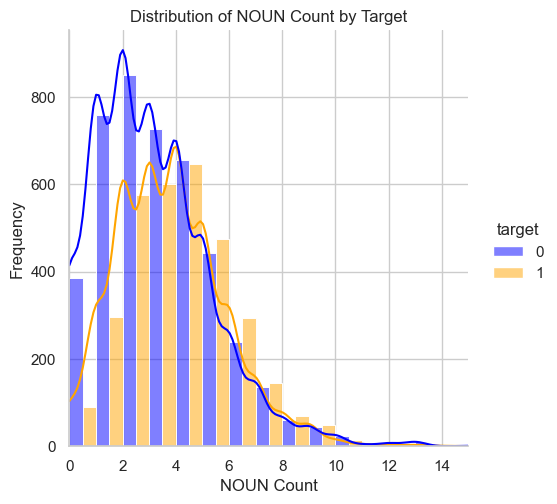

In [128]:
# Plot the distribution
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.displot(data= df, x='NOUN_counts', hue='target', kde=True, multiple='dodge', palette=['blue', 'orange'], binwidth = 1)
plt.xlim(0, 15)
plt.title('Distribution of NOUN Count by Target')
plt.xlabel('NOUN Count')
plt.ylabel('Frequency')
plt.show()

target
0    0.847075
1    0.948640
Name: ADJ_counts, dtype: float64


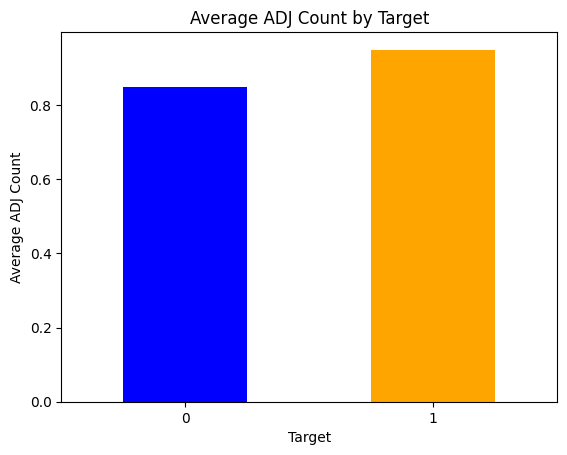

In [9]:
average_adj = df.groupby('target')['ADJ_counts'].mean()

print(average_adj)

average_adj.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average ADJ Count by Target')
plt.xlabel('Target')
plt.ylabel('Average ADJ Count')
plt.xticks(rotation=0)
plt.show()

<Figure size 1000x600 with 0 Axes>

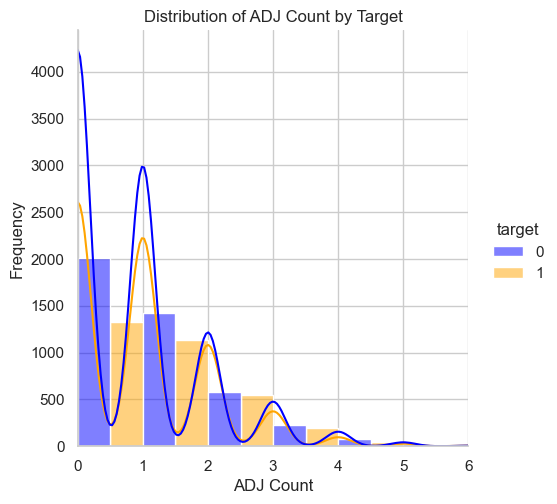

In [129]:
# Plot the distribution
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.displot(data= df, x='ADJ_counts', hue='target', kde=True, multiple='dodge', palette=['blue', 'orange'], binwidth = 1)
plt.xlim(0, 6)
plt.title('Distribution of ADJ Count by Target')
plt.xlabel('ADJ Count')
plt.ylabel('Frequency')
plt.show()

target
0    1.883234
1    1.764904
Name: VERB_counts, dtype: float64


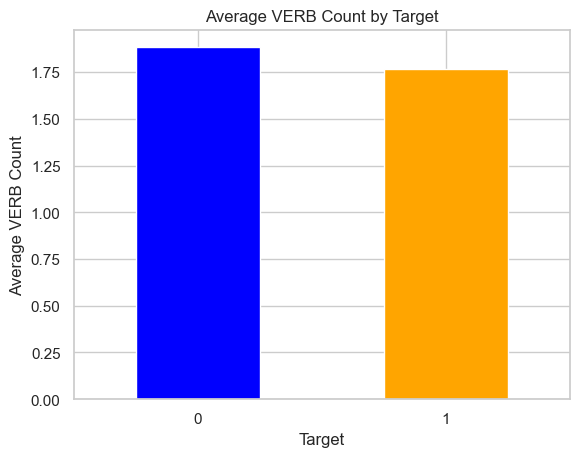

In [56]:
average_verb = df.groupby('target')['VERB_counts'].mean()

print(average_verb)

average_verb.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average VERB Count by Target')
plt.xlabel('Target')
plt.ylabel('Average VERB Count')
plt.xticks(rotation=0)
plt.show()

<Figure size 1000x600 with 0 Axes>

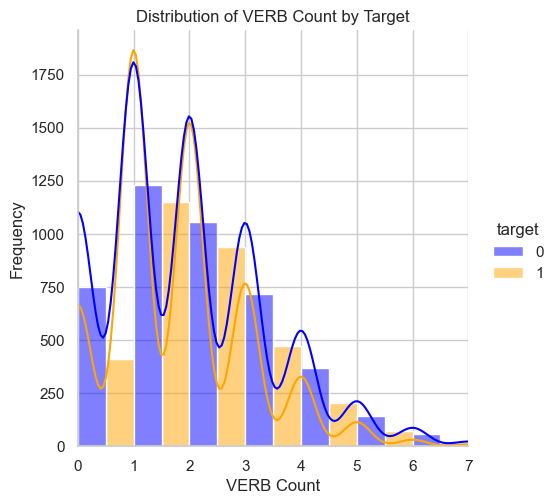

In [130]:
# Plot the distribution
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.displot(data= df, x='VERB_counts', hue='target', kde=True, multiple='dodge', palette=['blue', 'orange'], binwidth = 1)
plt.xlim(0, 7)
plt.title('Distribution of VERB Count by Target')
plt.xlabel('VERB Count')
plt.ylabel('Frequency')
plt.show()

target
0    1.278904
1    1.708040
Name: ADP_counts, dtype: float64


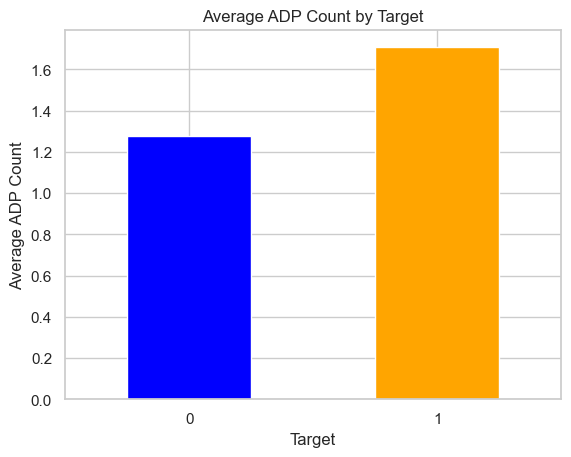

In [58]:
average_adp = df.groupby('target')['ADP_counts'].mean()

print(average_adp)

average_adp.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average ADP Count by Target')
plt.xlabel('Target')
plt.ylabel('Average ADP Count')
plt.xticks(rotation=0)
plt.show()

<Figure size 1000x600 with 0 Axes>

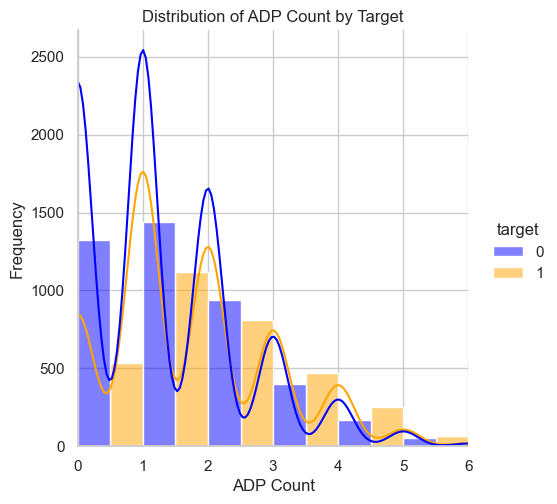

In [131]:
# Plot the distribution
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.displot(data= df, x='ADP_counts', hue='target', kde=True, multiple='dodge', palette=['blue', 'orange'], binwidth = 1)
plt.xlim(0, 6)
plt.title('Distribution of ADP Count by Target')
plt.xlabel('ADP Count')
plt.ylabel('Frequency')
plt.show()

target
0    1.393137
1    0.653011
Name: PRON_counts, dtype: float64


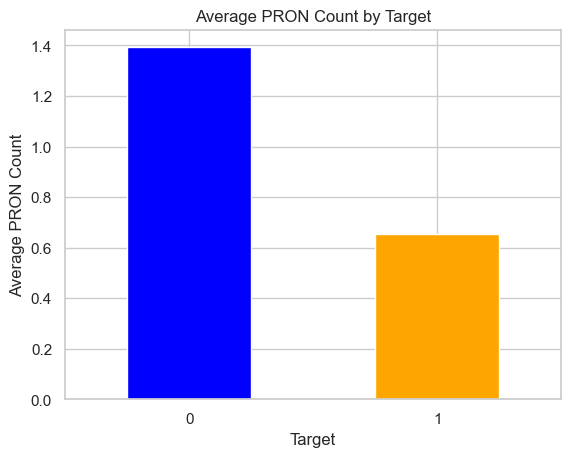

In [60]:
average_pron = df.groupby('target')['PRON_counts'].mean()

print(average_pron)

average_pron.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average PRON Count by Target')
plt.xlabel('Target')
plt.ylabel('Average PRON Count')
plt.xticks(rotation=0)
plt.show()

<Figure size 1000x600 with 0 Axes>

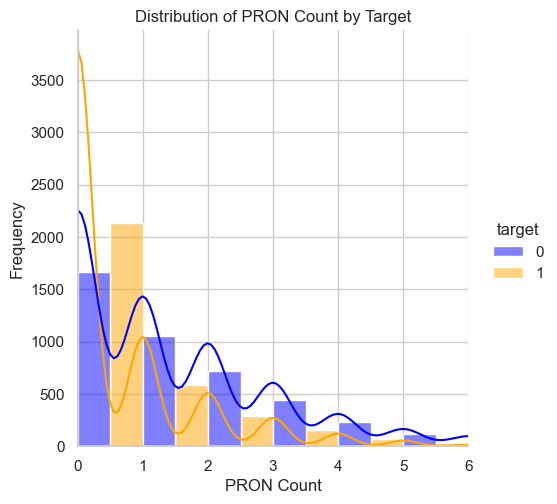

In [133]:
# Plot the distribution
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.displot(data= df, x='PRON_counts', hue='target', kde=True, multiple='dodge', palette=['blue', 'orange'], binwidth = 1)
plt.xlim(0, 6)
plt.title('Distribution of PRON Count by Target')
plt.xlabel('PRON Count')
plt.ylabel('Frequency')
plt.show()

In [63]:
# Function to count subordinate clauses
def count_subordinate_clauses(text):
    doc = nlp(text)
    # Initialize counter for subordinate clauses
    subordinate_clause_count = 0
    # Iterate over the tokens in the document
    for token in doc:
        # Check if the token is a subordinating conjunction or a dependent marker
        if token.dep_ in ['mark', 'advcl', 'ccomp']:
            subordinate_clause_count += 1
    return subordinate_clause_count

# Apply the function to each row of the 'text' column
df['subordinate_clause_count'] = df['text'].apply(count_subordinate_clauses)

df

,Unnamed: 0.1,Unnamed: 0,id,keyword,location,text,target,text_length,word_count,stop_word_ratio,...,ADJ_counts,VERB_counts,ADP_counts,PRON_counts,subordinate_clause_count,passive_construction_count,positive,neutral,negative,number_count
0,0,0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,13,0.461538,...,0,1,1,3,1,0,0.0197,0.1801,0.8002,0
1,1,1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,7,0.000000,...,0,0,1,0,0,0,0.0238,0.7955,0.1807,0
2,2,2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,22,0.500000,...,1,5,3,0,0,0,0.0304,0.9026,0.0670,0
3,3,3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,8,0.125000,...,0,1,1,0,0,0,0.0276,0.7638,0.2086,5
4,4,4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,16,0.437500,...,0,2,3,0,2,0,0.0249,0.7995,0.1756,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,7608,7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,83,11,0.181818,...,2,2,1,0,0,0,0.0197,0.5705,0.4098,1
7609,7609,7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,125,20,0.450000,...,3,0,5,0,0,0,0.0101,0.1204,0.8695,0
7610,7610,7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65,8,0.250000,...,0,0,1,0,0,0,0.0248,0.9579,0.0173,9
7611,7611,7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,137,19,0.263158,...,4,4,2,0,2,0,0.0123,0.3280,0.6596,0


target
0    0.662368
1    0.517273
Name: subordinate_clause_count, dtype: float64


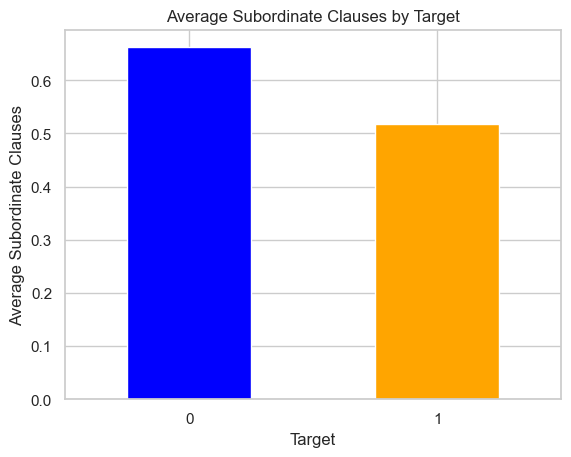

In [64]:
average_subordinate = df.groupby('target')['subordinate_clause_count'].mean()

print(average_subordinate)

average_subordinate.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average Subordinate Clauses by Target')
plt.xlabel('Target')
plt.ylabel('Average Subordinate Clauses')
plt.xticks(rotation=0)
plt.show()

<Figure size 1000x600 with 0 Axes>

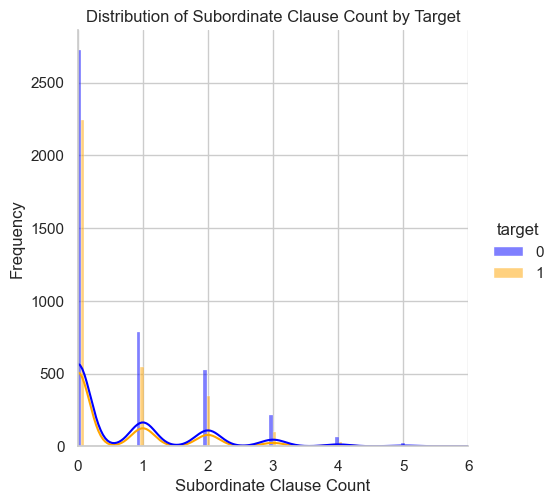

In [134]:
# Plot the distribution
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.displot(data= df, x='subordinate_clause_count', hue='target', kde=True, multiple='dodge', palette=['blue', 'orange'])
plt.xlim(0, 6)
plt.title('Distribution of Subordinate Clause Count by Target')
plt.xlabel('Subordinate Clause Count')
plt.ylabel('Frequency')
plt.show()

In [66]:
# Function to count passive constructions
def count_passive_constructions(text):
    doc = nlp(text)
    # Initialize counter for passive constructions
    passive_construction_count = 0
    # Iterate over the tokens in the document
    for token in doc:
        # Check if the token is a verb in passive voice (identified by its dependency relation)
        if token.dep_ == 'pass' and token.head.pos_ == 'VERB':
            passive_construction_count += 1
    return passive_construction_count

# Apply the function to each row of the 'text' column
df['passive_construction_count'] = df['text'].apply(count_passive_constructions)

df

,Unnamed: 0.1,Unnamed: 0,id,keyword,location,text,target,text_length,word_count,stop_word_ratio,...,ADJ_counts,VERB_counts,ADP_counts,PRON_counts,subordinate_clause_count,passive_construction_count,positive,neutral,negative,number_count
0,0,0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,13,0.461538,...,0,1,1,3,1,0,0.0197,0.1801,0.8002,0
1,1,1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,7,0.000000,...,0,0,1,0,0,0,0.0238,0.7955,0.1807,0
2,2,2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,22,0.500000,...,1,5,3,0,0,0,0.0304,0.9026,0.0670,0
3,3,3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,8,0.125000,...,0,1,1,0,0,0,0.0276,0.7638,0.2086,5
4,4,4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,16,0.437500,...,0,2,3,0,2,0,0.0249,0.7995,0.1756,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,7608,7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,83,11,0.181818,...,2,2,1,0,0,0,0.0197,0.5705,0.4098,1
7609,7609,7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,125,20,0.450000,...,3,0,5,0,0,0,0.0101,0.1204,0.8695,0
7610,7610,7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65,8,0.250000,...,0,0,1,0,0,0,0.0248,0.9579,0.0173,9
7611,7611,7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,137,19,0.263158,...,4,4,2,0,2,0,0.0123,0.3280,0.6596,0


target
0    0.0
1    0.0
Name: passive_construction_count, dtype: float64


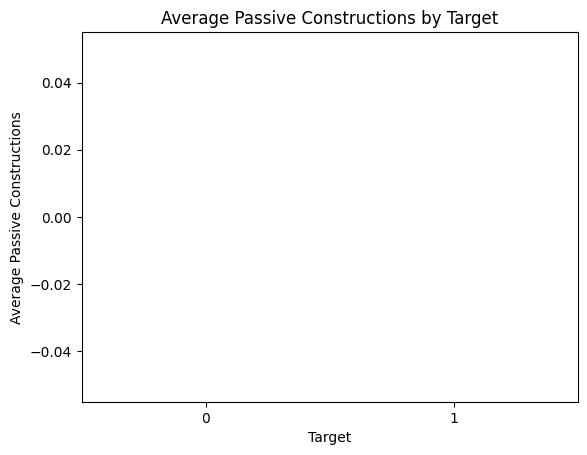

In [18]:
average_passive = df.groupby('target')['passive_construction_count'].mean()

print(average_passive)

average_passive.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average Passive Constructions by Target')
plt.xlabel('Target')
plt.ylabel('Average Passive Constructions')
plt.xticks(rotation=0)
plt.show()

In [21]:
from transformers import AutoModelForSequenceClassification
from transformers import AutoTokenizer, AutoConfig
from tqdm.notebook import tqdm
from scipy.special import softmax
import numpy as np

# Preprocess text (username and link placeholders)
def preprocess(text):
    new_text = []
    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
config = AutoConfig.from_pretrained(MODEL)
# PT
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

def get_scores(scores):
    score = dict()
    ranking = np.argsort(scores)
    ranking = ranking[::-1]
    for i in range(scores.shape[0]):
        l = config.id2label[ranking[i]]
        s = scores[ranking[i]]
        score[l] = np.round(float(s), 4)

    return score


df["positive"] = 0
df["neutral"] = 0
df["negative"] = 0


for i in tqdm(df.index):
    text = df["text"][i]
    text = preprocess(text)
    encoded_input = tokenizer(text, return_tensors='pt')
    output = model(**encoded_input)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    dict_scores = get_scores(scores)
    df["positive"][i] = dict_scores["positive"]
    df["neutral"][i] = dict_scores["neutral"]
    df["negative"][i] = dict_scores["negative"]

df

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


  0%|          | 0/7613 [00:00<?, ?it/s]

/var/folders/2m/6k44b9f10vv9hpw7fs7d_svm0000gn/T/ipykernel_17190/550206000.py:46: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["positive"][i] = dict_scores["positive"]
/var/folders/2m/6k44b9f10vv9hpw7fs7d_svm0000gn/T/ipykernel_17190/5502

,Unnamed: 0,id,keyword,location,text,target,text_length,word_count,stop_word_ratio,unique_word_count,...,NOUN_counts,ADJ_counts,VERB_counts,ADP_counts,PRON_counts,subordinate_clause_count,passive_construction_count,positive,neutral,negative
0,0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,13,0.461538,14,...,4,0,1,1,3,1,0,0.0197,0.1801,0.8002
1,1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,7,0.000000,8,...,2,0,0,1,0,0,0,0.0238,0.7955,0.1807
2,2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,22,0.500000,21,...,6,1,5,3,0,0,0,0.0304,0.9026,0.0670
3,3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,8,0.125000,9,...,4,0,1,1,0,0,0,0.0276,0.7638,0.2086
4,4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,16,0.437500,16,...,4,0,2,3,0,2,0,0.0249,0.7995,0.1756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,83,11,0.181818,13,...,3,2,2,1,0,0,0,0.0197,0.5705,0.4098
7609,7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,125,20,0.450000,18,...,4,3,0,5,0,0,0,0.0101,0.1204,0.8695
7610,7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65,8,0.250000,15,...,2,0,0,1,0,0,0,0.0248,0.9579,0.0173
7611,7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,137,19,0.263158,19,...,10,4,4,2,0,2,0,0.0123,0.3280,0.6596


In [68]:
df = pd.read_csv('analyzed_train.csv')

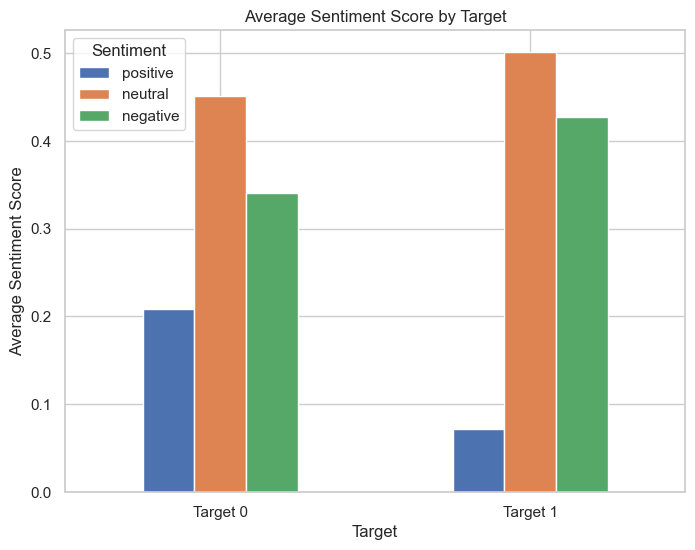

In [69]:
# Calculate average sentiment scores for each target group
average_scores = df.groupby('target')[['positive', 'neutral', 'negative',]].mean()

# Plot the average sentiment scores
average_scores.plot(kind='bar', figsize=(8, 6))
plt.xlabel('Target')
plt.ylabel('Average Sentiment Score')
plt.title('Average Sentiment Score by Target')
plt.xticks([0, 1], ['Target 0', 'Target 1'], rotation=0)
plt.legend(title='Sentiment')
plt.show()

In [70]:
# Function to count numbers
def count_numbers(text):
    numbers = sum(c.isdigit() for c in text)
    return numbers

# Apply the function to each row of the 'text' column
df['number_count'] = df['text'].apply(count_numbers)

df

,Unnamed: 0.1,Unnamed: 0,id,keyword,location,text,target,text_length,word_count,stop_word_ratio,...,ADJ_counts,VERB_counts,ADP_counts,PRON_counts,subordinate_clause_count,passive_construction_count,positive,neutral,negative,number_count
0,0,0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,13,0.461538,...,0,1,1,3,1,0,0.0197,0.1801,0.8002,0
1,1,1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,7,0.000000,...,0,0,1,0,0,0,0.0238,0.7955,0.1807,0
2,2,2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,22,0.500000,...,1,5,3,0,0,0,0.0304,0.9026,0.0670,0
3,3,3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,8,0.125000,...,0,1,1,0,0,0,0.0276,0.7638,0.2086,5
4,4,4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,16,0.437500,...,0,2,3,0,2,0,0.0249,0.7995,0.1756,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,7608,7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,83,11,0.181818,...,2,2,1,0,0,0,0.0197,0.5705,0.4098,1
7609,7609,7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,125,20,0.450000,...,3,0,5,0,0,0,0.0101,0.1204,0.8695,0
7610,7610,7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65,8,0.250000,...,0,0,1,0,0,0,0.0248,0.9579,0.0173,9
7611,7611,7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,137,19,0.263158,...,4,4,2,0,2,0,0.0123,0.3280,0.6596,0


target
0    1.590511
1    2.637420
Name: number_count, dtype: float64


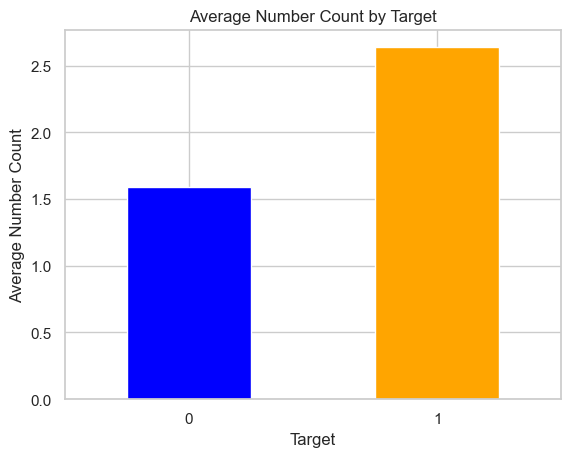

In [71]:
# Calculate the average number count by target
average_number_count = df.groupby('target')['number_count'].mean()

print(average_number_count)

# Plot the average number count
average_number_count.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average Number Count by Target')
plt.xlabel('Target')
plt.ylabel('Average Number Count')
plt.xticks(rotation=0)
plt.show()

<Figure size 1000x600 with 0 Axes>

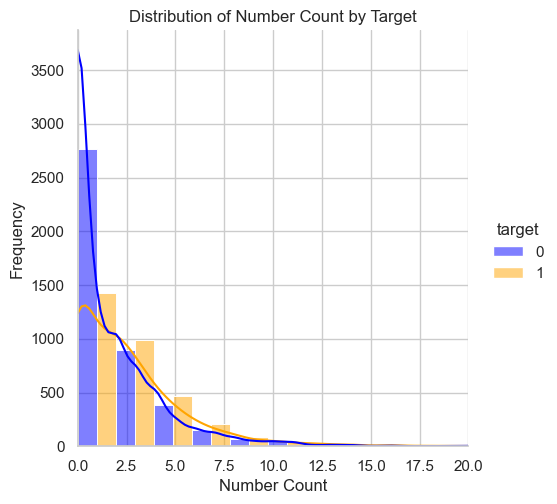

In [135]:
# Plot the distribution
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.displot(data= df, x='number_count', hue='target', kde=True, multiple='dodge', palette=['blue', 'orange'], binwidth = 2)
plt.xlim(0, 20)
plt.title('Distribution of Number Count by Target')
plt.xlabel('Number Count')
plt.ylabel('Frequency')
plt.show()

In [38]:
N = 100

STOPWORDS = set(stopwords.words('english'))

def generate_ngrams(text, n_gram=1):
    tokens = [token for token in text.lower().split(' ') if token != '' if token not in STOPWORDS]
    ngrams = zip(*[tokens[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]
        
# Unigrams
disaster_unigrams = defaultdict(int)
nondisaster_unigrams = defaultdict(int)

for tweet in df[df['target'] == 1]['text']:
    for word in generate_ngrams(tweet):
        disaster_unigrams[word] += 1
        
for tweet in df[df['target'] == 0]['text']:
    for word in generate_ngrams(tweet):
        nondisaster_unigrams[word] += 1
        
df_disaster_unigrams = pd.DataFrame(sorted(disaster_unigrams.items(), key=lambda x: x[1])[::-1])
df_nondisaster_unigrams = pd.DataFrame(sorted(nondisaster_unigrams.items(), key=lambda x: x[1])[::-1])

# Bigrams
disaster_bigrams = defaultdict(int)
nondisaster_bigrams = defaultdict(int)

for tweet in df[df['target'] == 1]['text']:
    for word in generate_ngrams(tweet, n_gram=2):
        disaster_bigrams[word] += 1
        
for tweet in df[df['target'] == 0]['text']:
    for word in generate_ngrams(tweet, n_gram=2):
        nondisaster_bigrams[word] += 1
        
df_disaster_bigrams = pd.DataFrame(sorted(disaster_bigrams.items(), key=lambda x: x[1])[::-1])
df_nondisaster_bigrams = pd.DataFrame(sorted(nondisaster_bigrams.items(), key=lambda x: x[1])[::-1])

# Trigrams
disaster_trigrams = defaultdict(int)
nondisaster_trigrams = defaultdict(int)

for tweet in df[df['target'] == 1]['text']:
    for word in generate_ngrams(tweet, n_gram=3):
        disaster_trigrams[word] += 1
        
for tweet in df[df['target'] == 0]['text']:
    for word in generate_ngrams(tweet, n_gram=3):
        nondisaster_trigrams[word] += 1
        
df_disaster_trigrams = pd.DataFrame(sorted(disaster_trigrams.items(), key=lambda x: x[1])[::-1])
df_nondisaster_trigrams = pd.DataFrame(sorted(nondisaster_trigrams.items(), key=lambda x: x[1])[::-1])

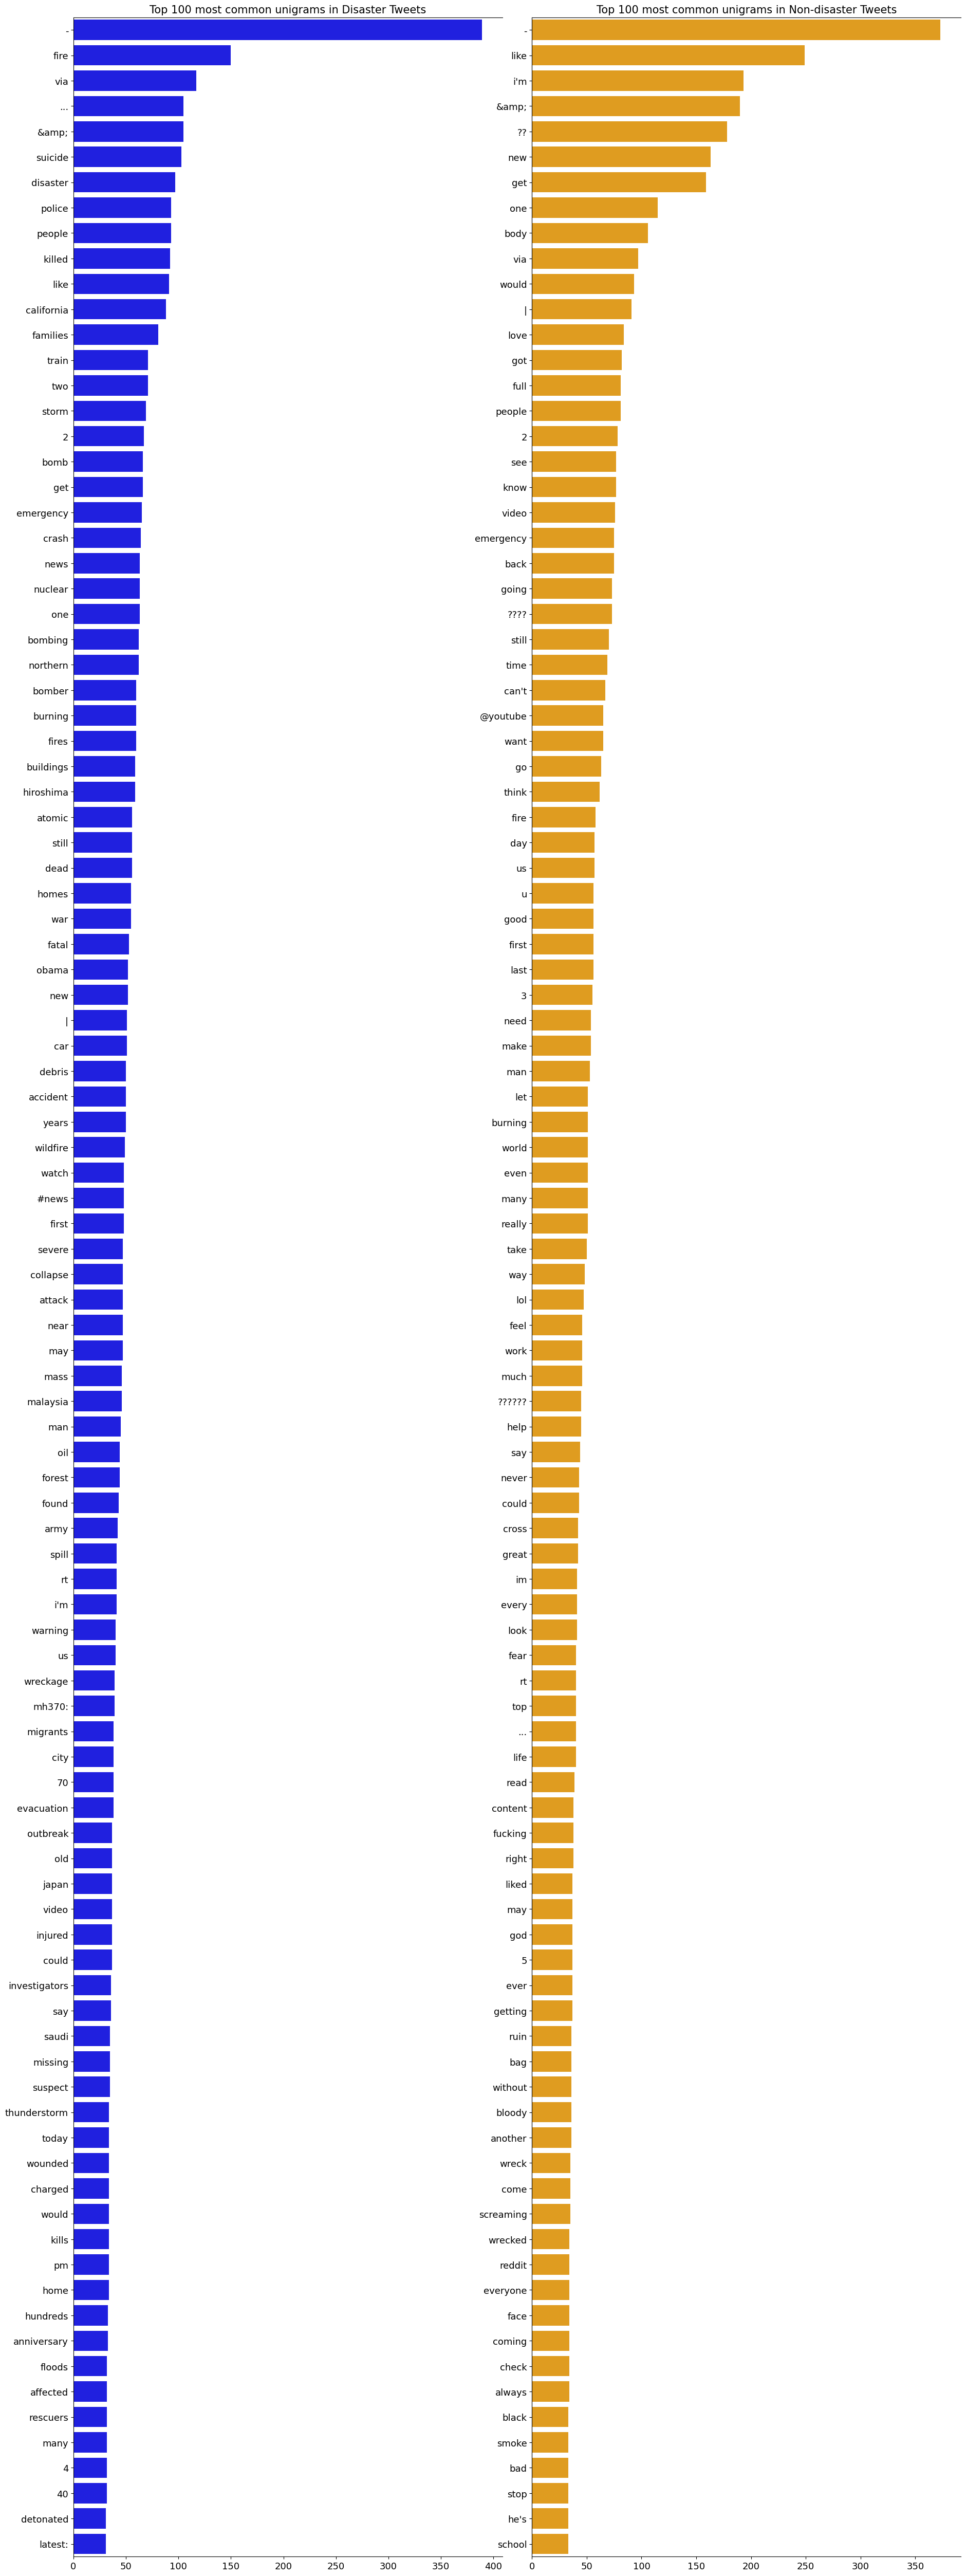

In [42]:
fig, axes = plt.subplots(ncols=2, figsize=(18, 50), dpi=100)
plt.tight_layout()

sns.barplot(y=df_disaster_unigrams[0].values[:N], x=df_disaster_unigrams[1].values[:N], ax=axes[0], color='blue')
sns.barplot(y=df_nondisaster_unigrams[0].values[:N], x=df_nondisaster_unigrams[1].values[:N], ax=axes[1], color='orange')

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Top {N} most common unigrams in Disaster Tweets', fontsize=15)
axes[1].set_title(f'Top {N} most common unigrams in Non-disaster Tweets', fontsize=15)

plt.show()

/opt/homebrew/Caskroom/miniconda/base/envs/hlt/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 137 (\x89) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


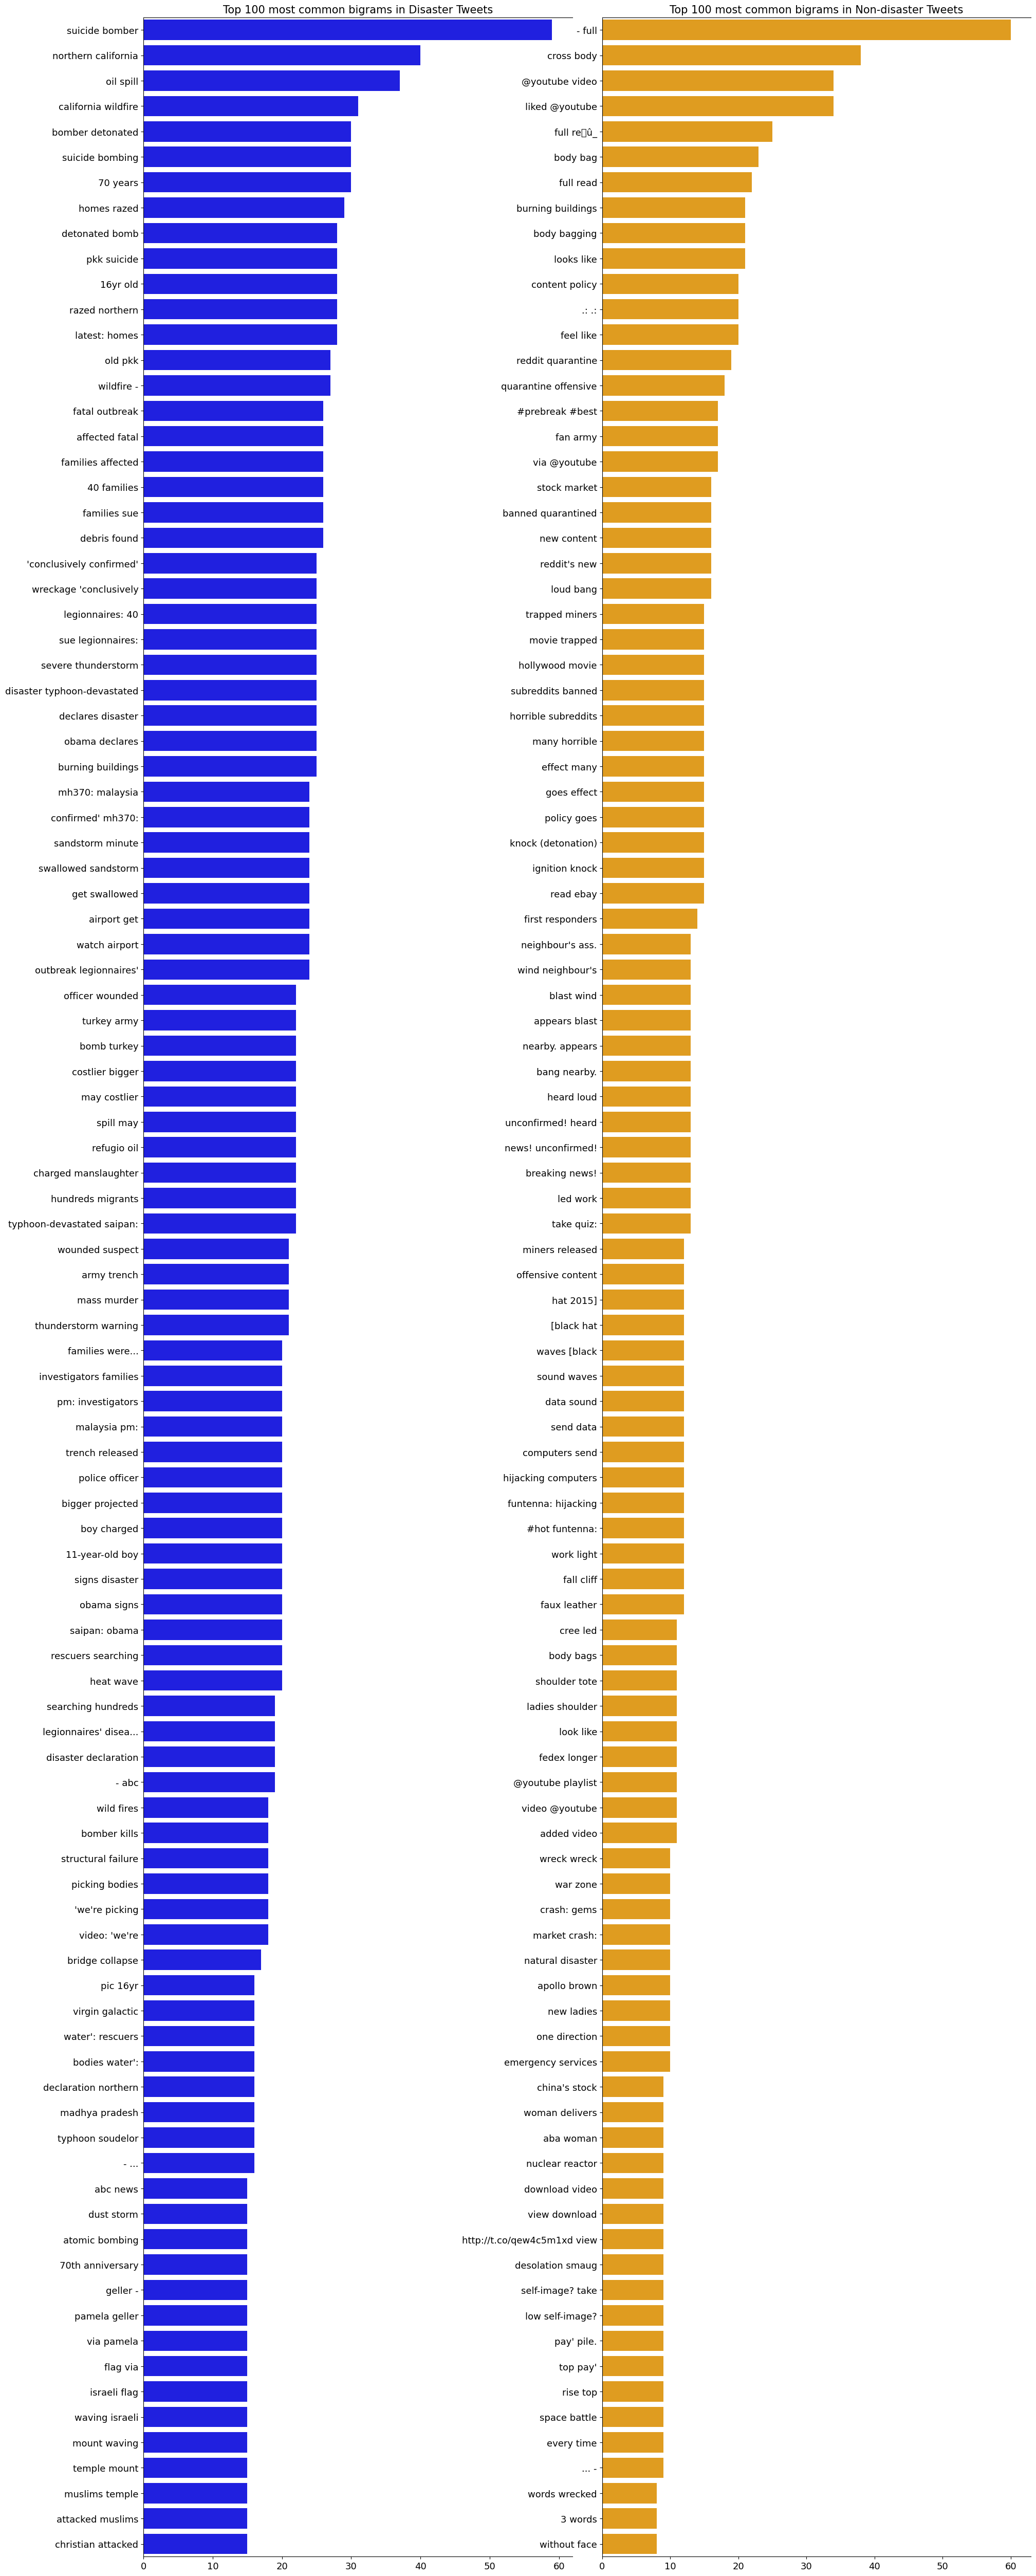

In [43]:
fig, axes = plt.subplots(ncols=2, figsize=(18, 50), dpi=100)
plt.tight_layout()

sns.barplot(y=df_disaster_bigrams[0].values[:N], x=df_disaster_bigrams[1].values[:N], ax=axes[0], color='blue')
sns.barplot(y=df_nondisaster_bigrams[0].values[:N], x=df_nondisaster_bigrams[1].values[:N], ax=axes[1], color='orange')

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Top {N} most common bigrams in Disaster Tweets', fontsize=15)
axes[1].set_title(f'Top {N} most common bigrams in Non-disaster Tweets', fontsize=15)

plt.show()

/opt/homebrew/Caskroom/miniconda/base/envs/hlt/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 137 (\x89) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


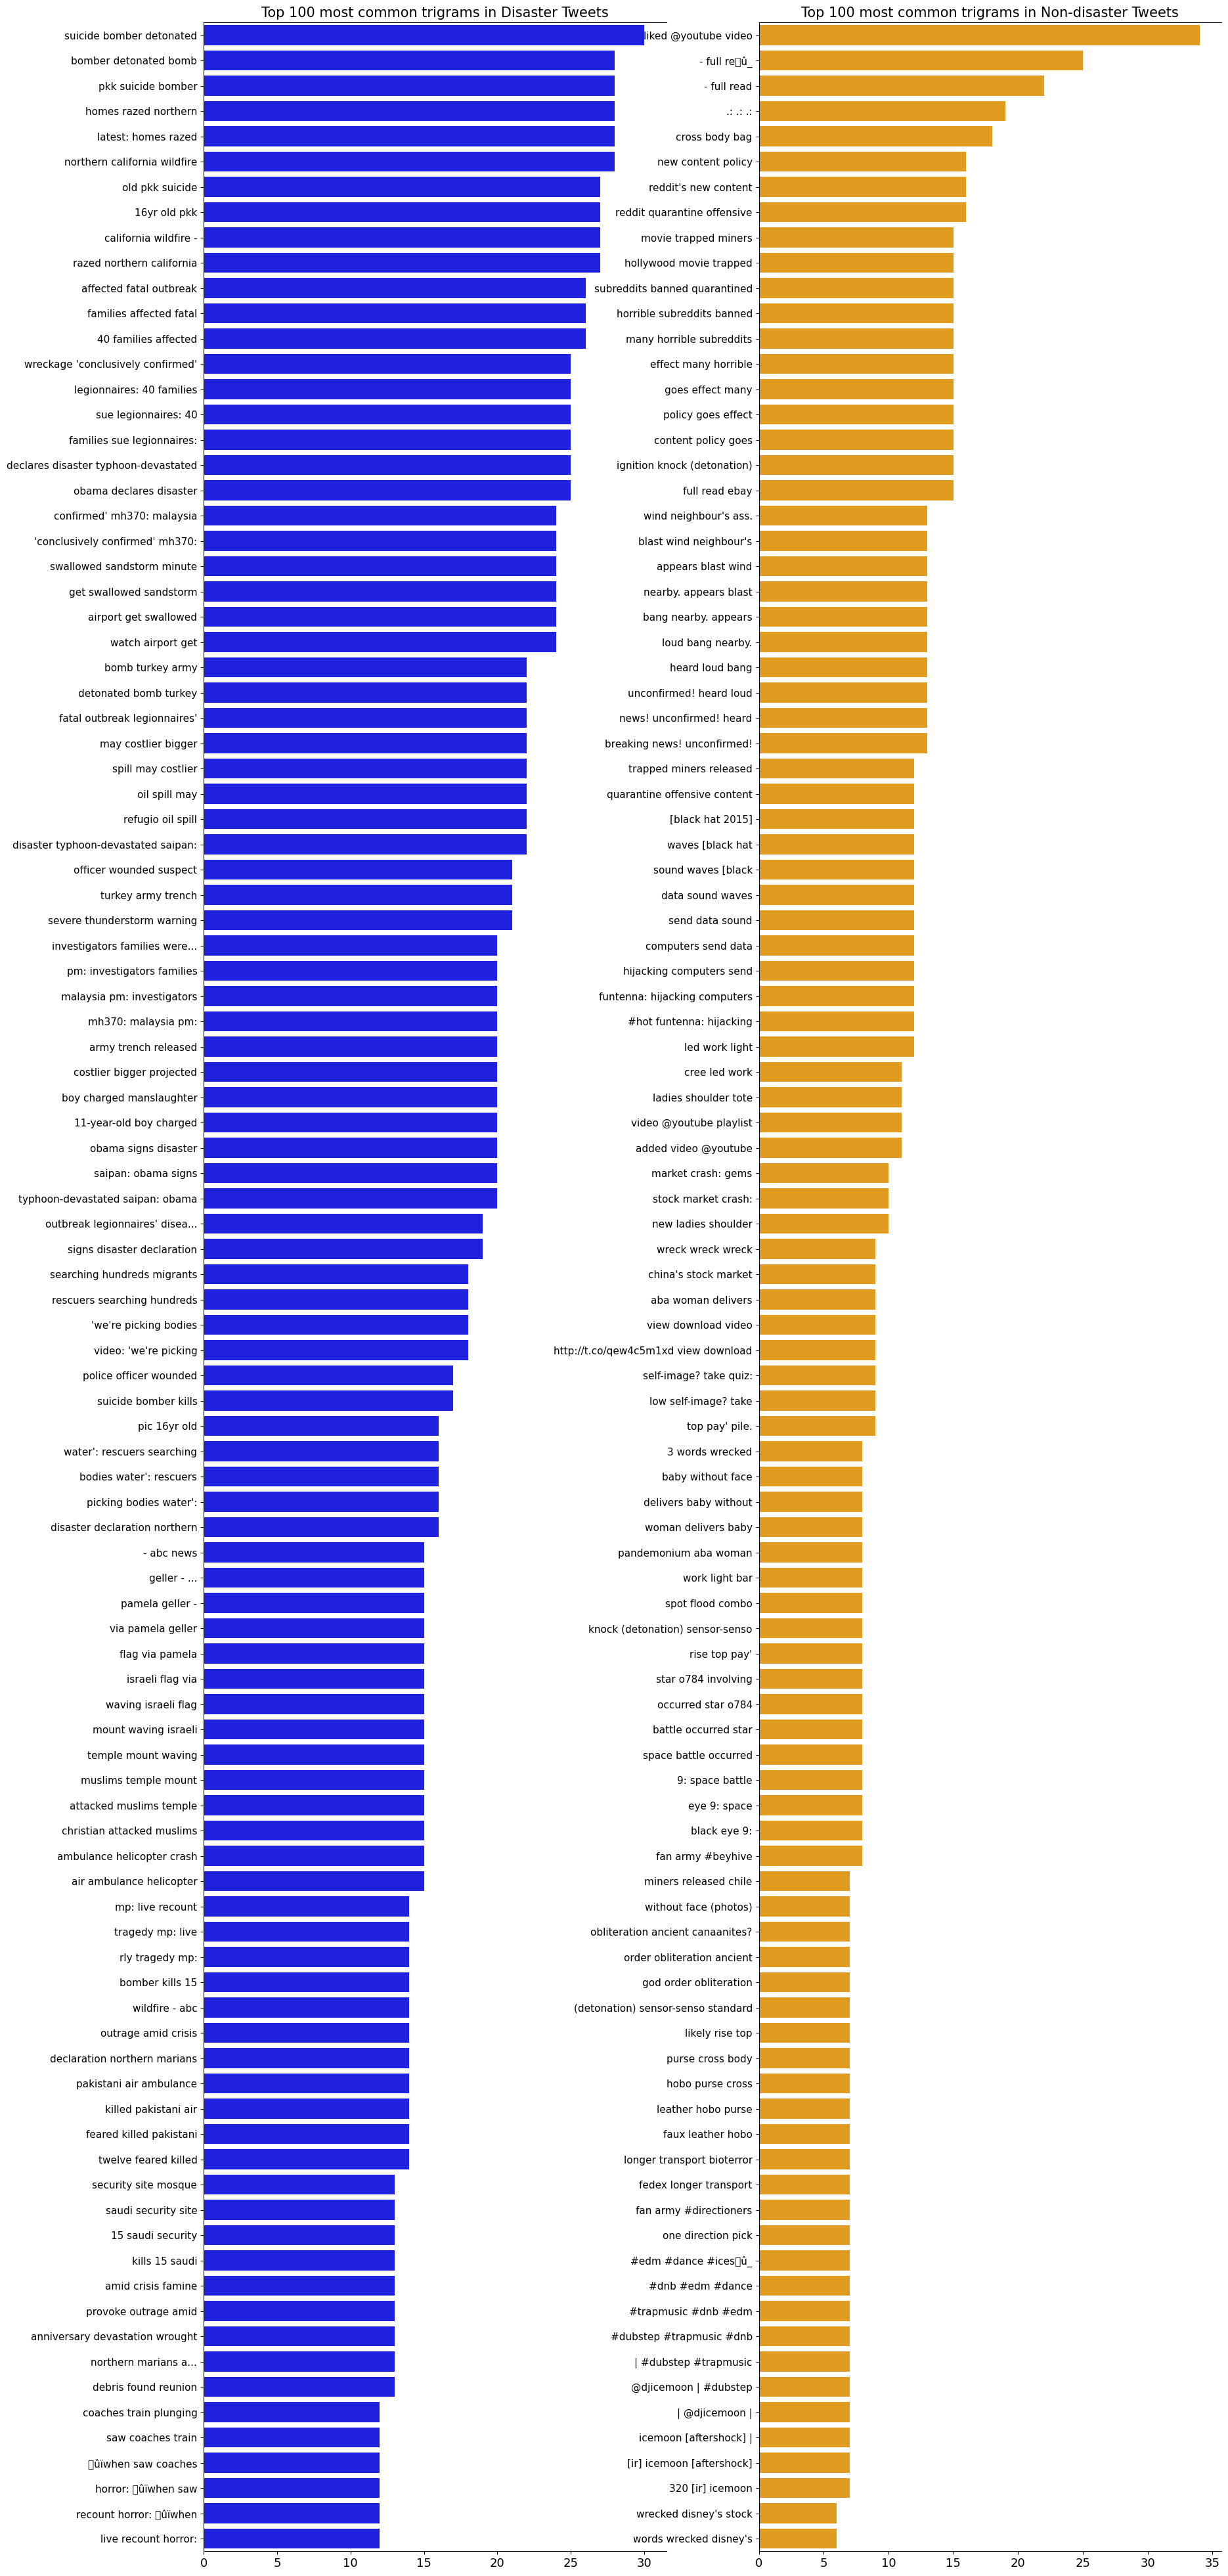

In [44]:
fig, axes = plt.subplots(ncols=2, figsize=(20, 50), dpi=100)

sns.barplot(y=df_disaster_trigrams[0].values[:N], x=df_disaster_trigrams[1].values[:N], ax=axes[0], color='blue')
sns.barplot(y=df_nondisaster_trigrams[0].values[:N], x=df_nondisaster_trigrams[1].values[:N], ax=axes[1], color='orange')

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=11)

axes[0].set_title(f'Top {N} most common trigrams in Disaster Tweets', fontsize=15)
axes[1].set_title(f'Top {N} most common trigrams in Non-disaster Tweets', fontsize=15)

plt.show()

,Unnamed: 0,id,keyword,location,text,target,text_length,word_count,stop_word_ratio,unique_word_count,...,ADJ_counts,VERB_counts,ADP_counts,PRON_counts,subordinate_clause_count,passive_construction_count,positive,neutral,negative,number_count
0,0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,13,0.461538,14,...,0,1,1,3,1,0,0.0197,0.1801,0.8002,0
1,1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,7,0.000000,8,...,0,0,1,0,0,0,0.0238,0.7955,0.1807,0
2,2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,22,0.500000,21,...,1,5,3,0,0,0,0.0304,0.9026,0.0670,0
3,3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,8,0.125000,9,...,0,1,1,0,0,0,0.0276,0.7638,0.2086,5
4,4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,16,0.437500,16,...,0,2,3,0,2,0,0.0249,0.7995,0.1756,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,83,11,0.181818,13,...,2,2,1,0,0,0,0.0197,0.5705,0.4098,1
7609,7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,125,20,0.450000,18,...,3,0,5,0,0,0,0.0101,0.1204,0.8695,0
7610,7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65,8,0.250000,15,...,0,0,1,0,0,0,0.0248,0.9579,0.0173,9
7611,7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,137,19,0.263158,19,...,4,4,2,0,2,0,0.0123,0.3280,0.6596,0


In [71]:
df = pd.read_csv('analyzed_train.csv')

In [115]:
# Function to count URLs in a given text
def count_urls(text):
    url_pattern = r'(https?://)?(www\.)?\S+\.\S+'
    urls = re.findall(url_pattern, text)
    return len(urls)

# Applying the function to the 'text' column
df['url_count'] = df['text'].apply(count_urls)
df

,Unnamed: 0.1,Unnamed: 0,id,keyword,location,text,target,text_length,word_count,stop_word_ratio,...,VERB_counts,ADP_counts,PRON_counts,subordinate_clause_count,passive_construction_count,positive,neutral,negative,number_count,url_count
0,0,0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,13,0.461538,...,1,1,3,1,0,0.0197,0.1801,0.8002,0,0
1,1,1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,7,0.000000,...,0,1,0,0,0,0.0238,0.7955,0.1807,0,0
2,2,2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,22,0.500000,...,5,3,0,0,0,0.0304,0.9026,0.0670,0,0
3,3,3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,8,0.125000,...,1,1,0,0,0,0.0276,0.7638,0.2086,5,0
4,4,4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,16,0.437500,...,2,3,0,2,0,0.0249,0.7995,0.1756,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,7608,7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,83,11,0.181818,...,2,1,0,0,0,0.0197,0.5705,0.4098,1,1
7609,7609,7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,125,20,0.450000,...,0,5,0,0,0,0.0101,0.1204,0.8695,0,0
7610,7610,7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65,8,0.250000,...,0,1,0,0,0,0.0248,0.9579,0.0173,9,2
7611,7611,7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,137,19,0.263158,...,4,2,0,2,0,0.0123,0.3280,0.6596,0,0


target
0    0.658452
1    1.028737
Name: url_count, dtype: float64


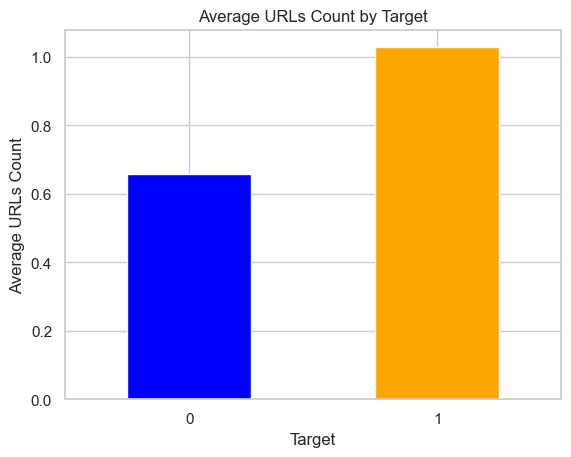

In [116]:
average_urls = df.groupby('target')['url_count'].mean()

print(average_urls)

average_urls.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average URLs Count by Target')
plt.xlabel('Target')
plt.ylabel('Average URLs Count')
plt.xticks(rotation=0)
plt.show()

<Figure size 1000x600 with 0 Axes>

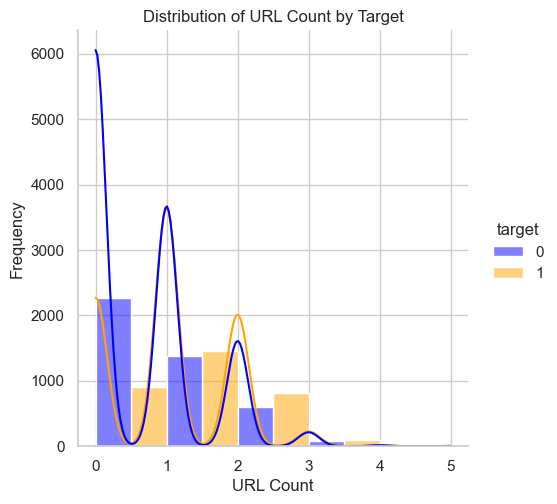

In [119]:
# Plot the distribution
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.displot(data= df, x='url_count', hue='target', kde=True, multiple='dodge', palette=['blue', 'orange'], binwidth = 1)
plt.title('Distribution of URL Count by Target')
plt.xlabel('URL Count')
plt.ylabel('Frequency')
plt.show()

In [120]:
def count_hashtags(text):
    hashtag_pattern = r'#\w+'
    hashtags = re.findall(hashtag_pattern, text)
    return len(hashtags)

# Applying the function to the 'text' column
df['hashtag_count'] = df['text'].apply(count_hashtags)
df

,Unnamed: 0.1,Unnamed: 0,id,keyword,location,text,target,text_length,word_count,stop_word_ratio,...,ADP_counts,PRON_counts,subordinate_clause_count,passive_construction_count,positive,neutral,negative,number_count,url_count,hashtag_count
0,0,0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,13,0.461538,...,1,3,1,0,0.0197,0.1801,0.8002,0,0,1
1,1,1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,7,0.000000,...,1,0,0,0,0.0238,0.7955,0.1807,0,0,0
2,2,2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,22,0.500000,...,3,0,0,0,0.0304,0.9026,0.0670,0,0,0
3,3,3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,8,0.125000,...,1,0,0,0,0.0276,0.7638,0.2086,5,0,1
4,4,4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,16,0.437500,...,3,0,2,0,0.0249,0.7995,0.1756,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,7608,7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,83,11,0.181818,...,1,0,0,0,0.0197,0.5705,0.4098,1,1,0
7609,7609,7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,125,20,0.450000,...,5,0,0,0,0.0101,0.1204,0.8695,0,0,0
7610,7610,7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65,8,0.250000,...,1,0,0,0,0.0248,0.9579,0.0173,9,2,0
7611,7611,7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,137,19,0.263158,...,2,0,2,0,0.0123,0.3280,0.6596,0,0,0


target
0    0.388761
1    0.501987
Name: hashtag_count, dtype: float64


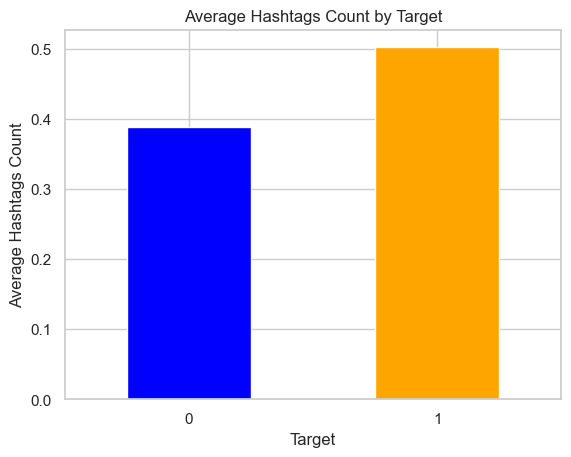

In [121]:
average_hashtags = df.groupby('target')['hashtag_count'].mean()

print(average_hashtags)

average_hashtags.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average Hashtags Count by Target')
plt.xlabel('Target')
plt.ylabel('Average Hashtags Count')
plt.xticks(rotation=0)
plt.show()

<Figure size 1000x600 with 0 Axes>

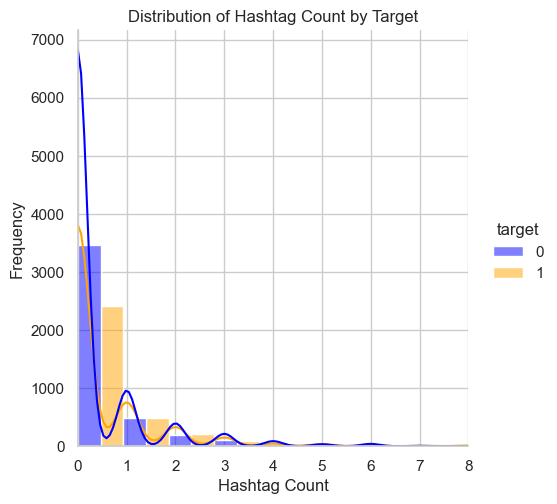

In [136]:
# Plot the distribution
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.displot(data= df, x='hashtag_count', hue='target', kde=True, multiple='dodge', palette=['blue', 'orange'])
plt.xlim(0, 8)
plt.title('Distribution of Hashtag Count by Target')
plt.xlabel('Hashtag Count')
plt.ylabel('Frequency')
plt.show()

In [138]:
df.to_csv('analyzed_train.csv')